# The Objective

### As a Data Scientist hired by a lending company, I was taked to develop a model that accurately predicts whether a loan applicant is likely to be approved or rejected by the lending institution. The goal is to leverage data and machine learning techniques to create a predictive model that can assist in the decision-making process for loan approval.

# Importing The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Importing the Dataset

In [2]:
# Let's import the dataset for the project

Loan_data = pd.read_csv('C:\\Users\\LENOVO USER\\Downloads\\train_u6lujuX_CVtuZ9i (1).csv')

# Check Top Five Rows of the Dataset

In [3]:
Loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Check Last Five Rows of The Dataset

In [4]:
Loan_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# Get Information About Our Dataset

In [5]:
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Find The Shape of Our Dataset (Number of Rows and Columns)

In [6]:
# Let's check the shape of our dataset

Loan_data.shape

(614, 13)

In [7]:
print('Numbers of Rows', Loan_data.shape[0])
print('Numbers of Columns', Loan_data.shape[1])

Numbers of Rows 614
Numbers of Columns 13


# Check The Null Values in Our Dataset

In [8]:
Loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Handling Missing Values

### Mode.

### Median.

In [9]:
# Let's view our data

Loan_data.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [10]:
# Fill missing values in categorical columns with mode

Loan_data['Gender'].fillna(Loan_data['Gender'].mode()[0], inplace=True)

In [11]:
Loan_data['Married'].fillna(Loan_data['Married'].mode()[0], inplace=True)

In [12]:
Loan_data['Dependents'].fillna(Loan_data['Dependents'].mode()[0], inplace=True)

In [13]:
Loan_data['Self_Employed'].fillna(Loan_data['Self_Employed'].mode()[0], inplace=True)

In [14]:
# Fill missing values in numerical columns with the median because there are outliers in our data

Loan_data['LoanAmount'].fillna(Loan_data['LoanAmount'].median(), inplace=True)

In [15]:
# We can fill the Loan Amount Term with mode Since the term of the loan amount is a discrete value

Loan_data['Loan_Amount_Term'].fillna(Loan_data['Loan_Amount_Term'].mode()[0], inplace=True)

In [16]:
# We can fill in the missing values of the credit history column with the mode value. Since credit history is a binary variable (0 or 1)

Loan_data['Credit_History'].fillna(Loan_data['Credit_History'].mode()[0], inplace=True)

In [17]:
# Let's check if there is missing values were successfully replaced

Loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Dropping Features Not Necessary For Our Prediction

In [18]:
Loan_data = Loan_data.drop('Loan_ID', axis=1)

In [19]:
# Let's check if the feature dropped was dropped successfully

Loan_data.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y


### 0--------> Rejected Loan

### 1---------> Loan Approval.

In [20]:
# Let's encode the Loan Status 

Loan_data.replace({'Loan_Status': {'N' :0, 'Y' :1}}, inplace = True)

In [21]:
Loan_data.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1


In [22]:
# let’s have a look at the distribution of the Dependents column

Loan_data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [23]:
# Replacing the value of 3+ to 4

Loan_data = Loan_data.replace(to_replace = '3+', value=4)

In [24]:
# Let's check if the 3+ in the dependent column was successfully replace with 4

Loan_data['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

# Exploratory Data Analysis

In [25]:
# let’s have a look at the distribution of the loan status column

Loan_data['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

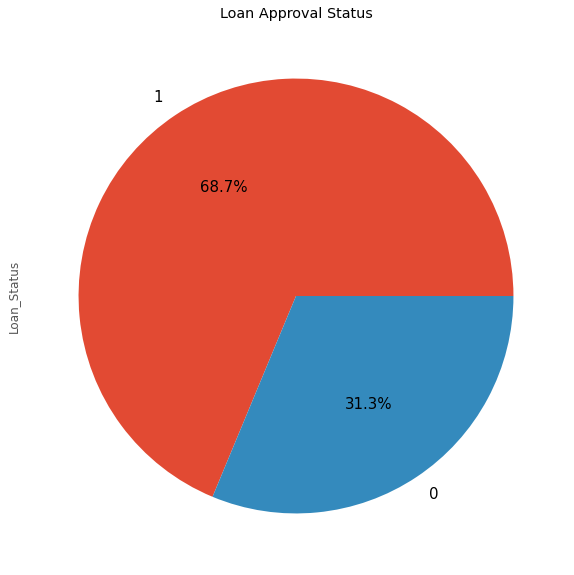

In [26]:
# Let's visualize the distribution of the loan status column

Loan_data['Loan_Status'].value_counts().plot(kind='pie', figsize=(10,10), autopct= '%1.1f%%', title = 'Loan Approval Status', fontsize=15)
plt.show()

### There are more loan approvals than rejected loans in our data.

In [27]:
# let’s have a look at the distribution of the Gender column

Loan_data['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

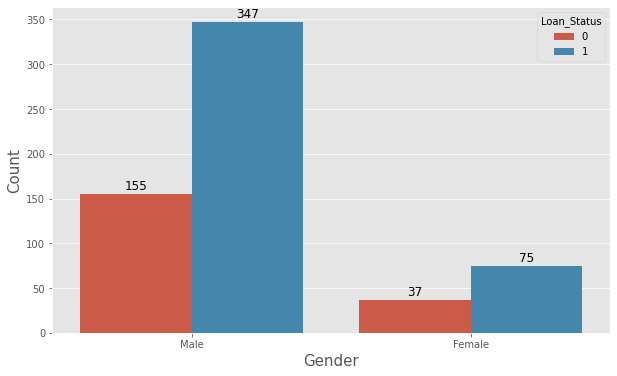

In [28]:
# Let's visualize the distribution of the Gender column

plt.figure(figsize=(10, 6))
plots = sns.countplot(x='Gender', hue='Loan_Status', data=Loan_data)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Count', fontsize=15)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
plt.show()

### There are more loan approvals in males than there are in the females. Also, there are more rejected loans in the male than there are in the female.

In [29]:
# let’s have a look at the distribution of the Education column

Loan_data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

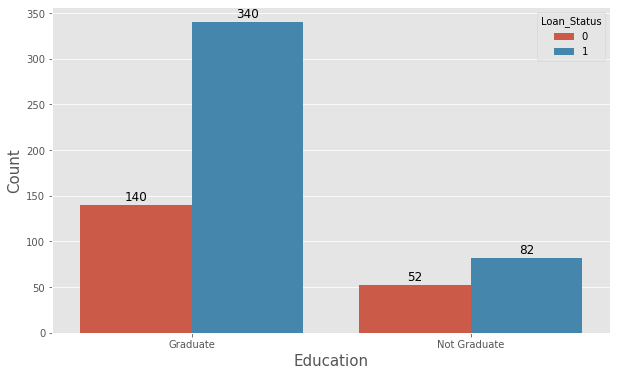

In [30]:
# Let's visualize the distribution of the Gender column

plt.figure(figsize=(10, 6))
plots = sns.countplot(x='Education', hue='Loan_Status', data=Loan_data)
plt.xlabel('Education', fontsize=15)
plt.ylabel('Count', fontsize=15)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
plt.show()

### There are more loan approvals for customers that are graduates than customers that are not graduates.

In [31]:
# let’s have a look at the distribution of the Married column

Loan_data['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

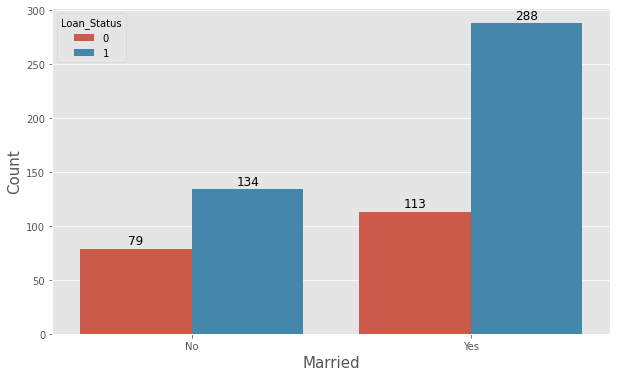

In [32]:
# Let's visualize the distribution of the Married column

plt.figure(figsize=(10, 6))
plots = sns.countplot(x='Married', hue='Loan_Status', data=Loan_data)
plt.xlabel('Married', fontsize=15)
plt.ylabel('Count', fontsize=15)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
plt.show()

### There are more loan approvals for customers that are married than customers who are not married.

In [33]:
# let’s have a look at the distribution of the Property_Area column

Loan_data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

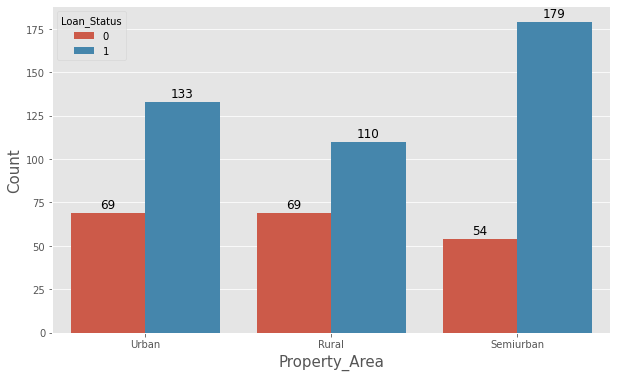

In [34]:
# Let's visualize the distribution of the Property_Area column

plt.figure(figsize=(10, 6))
plots = sns.countplot(x='Property_Area', hue='Loan_Status', data=Loan_data)
plt.xlabel('Property_Area', fontsize=15)
plt.ylabel('Count', fontsize=15)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
plt.show()

### There are more loan approvals for customers residing in the semiurban than rejected loans.

In [35]:
# Let's view our data

Loan_data.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0


In [36]:
# let’s have a look at the distribution of the Self_Employed column

Loan_data['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

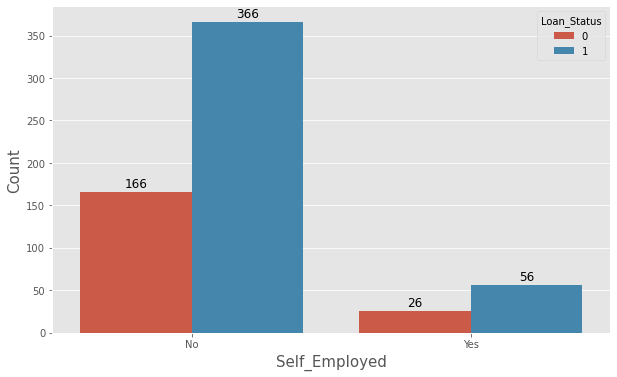

In [37]:
# Let's visualize the distribution of the Self_Employed column

plt.figure(figsize=(10, 6))
plots = sns.countplot(x='Self_Employed', hue='Loan_Status', data=Loan_data)
plt.xlabel('Self_Employed', fontsize=15)
plt.ylabel('Count', fontsize=15)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
plt.show()

### There are more loan approvals for customers that are not self-employed than customers that are self-employed.

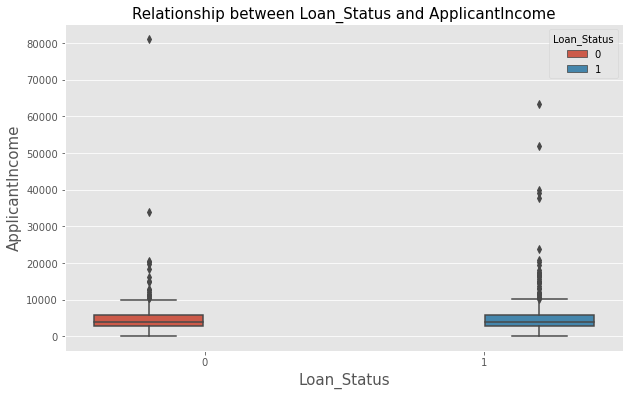

In [38]:
# Now let’s have a look at the relationship between the income of the loan applicant and the loan status

plt.figure(figsize=(10, 6))
sns.boxplot(x="Loan_Status", y="ApplicantIncome", hue="Loan_Status", data=Loan_data)
plt.xlabel("Loan_Status", fontsize=15)
plt.ylabel("ApplicantIncome", fontsize=15)
plt.title("Relationship between Loan_Status and ApplicantIncome", fontsize=15)
plt.show()

### There are outliers in the column of the loan applicant.

In [39]:
# We are going to remove the outliers in this column

# Calculate the IQR
Q1 = Loan_data['ApplicantIncome'].quantile(0.25)
Q3 = Loan_data['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
Loan_data = Loan_data[(Loan_data['ApplicantIncome'] >= lower_bound) & (Loan_data['ApplicantIncome'] <= upper_bound)]

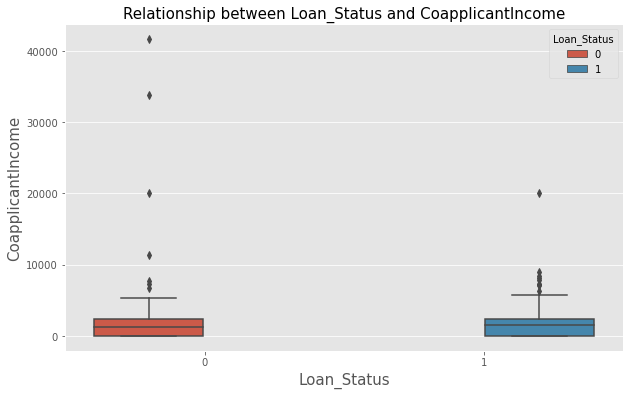

In [40]:
# let’s have a look at the relationship between the income of the loan co-applicant and the loan status

plt.figure(figsize=(10, 6))
sns.boxplot(x="Loan_Status", y="CoapplicantIncome", hue="Loan_Status", data=Loan_data)
plt.xlabel("Loan_Status", fontsize=15)
plt.ylabel("CoapplicantIncome", fontsize=15)
plt.title("Relationship between Loan_Status and CoapplicantIncome", fontsize=15)
plt.show()

### There are outliers in the column of the CoapplicantIncome.

In [41]:
# We are going to remove the outliers in this column

# Calculate the IQR
Q1 = Loan_data['CoapplicantIncome'].quantile(0.25)
Q3 = Loan_data['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
Loan_data = Loan_data[(Loan_data['CoapplicantIncome'] >= lower_bound) & (Loan_data['CoapplicantIncome'] <= upper_bound)]

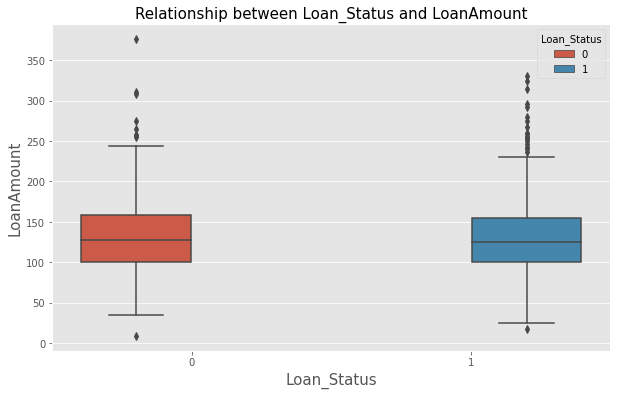

In [42]:
# let’s have a look at the relationship between the loan amount and the loan status

plt.figure(figsize=(10, 6))
sns.boxplot(x="Loan_Status", y="LoanAmount", hue="Loan_Status", data=Loan_data)
plt.xlabel("Loan_Status", fontsize=15)
plt.ylabel("LoanAmount", fontsize=15)
plt.title("Relationship between Loan_Status and LoanAmount", fontsize=15)
plt.show()

### There are outliers in the column of the LoanAmount.

In [43]:
# We are going to remove the outliers in this column

# Calculate the IQR
Q1 = Loan_data['LoanAmount'].quantile(0.25)
Q3 = Loan_data['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
Loan_data = Loan_data[(Loan_data['LoanAmount'] >= lower_bound) & (Loan_data['LoanAmount'] <= upper_bound)]

# Machine Learning Modelling

### In this step, we will:

### . First step, we import all the required libraries.
### . Then convert categorical columns into numerical.
### . Split the data into training and test sets.
### . Scale the numerical features.
### . Train the loan approval prediction model.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [45]:
# Let's convert categorical columns to numerical values

Loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [46]:
Loan_data.replace({'Gender' :{'Male' :0, 'Female' :1}, 'Married' :{'No' :1, 'Yes' :0}, 'Education' :{'Graduate' :0, 'Not Graduate' :1},
                  'Self_Employed' :{'No' :1, 'Yes' :0}, 'Property_Area' :{'Urban' :0, 'Rural' :1, 'Semiurban' :2}}, inplace=True)

In [47]:
# Let's view our data to check if the categorical columns were converted to numerical values

Loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,1,5849,0.0,128.0,360.0,1.0,0,1
1,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,1,0
2,0,0,0,0,0,3000,0.0,66.0,360.0,1.0,0,1
3,0,0,0,1,1,2583,2358.0,120.0,360.0,1.0,0,1
4,0,1,0,0,1,6000,0.0,141.0,360.0,1.0,0,1


# Store Feature Variables in X and Target in Vector Y

In [48]:
X = Loan_data.drop('Loan_Status', axis = 1)
Y = Loan_data['Loan_Status']

In [49]:
# Let's view the X values

print(X)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         0        1          0          0              1             5849   
1         0        0          1          0              1             4583   
2         0        0          0          0              0             3000   
3         0        0          0          1              1             2583   
4         0        1          0          0              1             6000   
..      ...      ...        ...        ...            ...              ...   
608       0        0          0          0              1             3232   
609       1        1          0          0              1             2900   
610       0        0          4          0              1             4106   
612       0        0          2          0              1             7583   
613       1        1          0          0              0             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [50]:
# Let's view the X values

print(Y)

0      1
1      0
2      1
3      1
4      1
      ..
608    1
609    1
610    1
612    1
613    0
Name: Loan_Status, Length: 520, dtype: int64


# Splitting The Dataset into Training and Test data

In [51]:
# Let's split the data into training and test train

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [52]:
# let's check the shapes of x_train and x_test

print(X.shape, X_train.shape, X_test.shape)

(520, 11) (416, 11) (104, 11)


# Feature Scaling

In [53]:
Scaler = StandardScaler()

In [54]:
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

# Model Training--------> RandomForestClassifier

In [55]:
Rf = RandomForestClassifier()
Rf.fit(X_train, Y_train)
y_pred1 = Rf.predict(X_test)
print(accuracy_score(Y_test, y_pred1))

0.8076923076923077


### This is a good accuracy score which means out of 100 predictions our model can predict correctly for 80 values.

# Save The Model

In [56]:
# Let's save our model on entire dataset

Rf = RandomForestClassifier()
Rf = Rf.fit(X, Y)

In [57]:
# Let's import joblib library

import joblib

In [58]:
joblib.dump(Rf, 'Loan Approval Predictor')

['Loan Approval Predictor']

### Our model has been saved with Loan Approval Predictor which means it will be used for future prediction.

# Let's Load The Saved Model

In [59]:
Model = joblib.load('Loan Approval Predictor')

# Prediction on New Data

In [60]:
# Let's view our dataset

Loan_data.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,1,5849,0.0,128.0,360.0,1.0,0,1
1,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,1,0


In [61]:
# Let's create a new dataset

import pandas as pd
New_data = pd.DataFrame({
    'Gender' :1,
    'Married' :0,
    'Dependents' :4,
    'Education' :1,
    'Self_Employed' :0,
    'ApplicantIncome' :3550,
    'CoapplicantIncome' :1609.0,
    'LoanAmount' :139.0,
    'Loan_Amount_Term' :370.0,
    'Credit_History' :1.0,
    'Property_Area':2,
}, index=[0])

In [62]:
# Let's view our New data

New_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,4,1,0,3550,1609.0,139.0,370.0,1.0,2


In [63]:
# Let's make a prediction using the new data

Model.predict(New_data)

array([1], dtype=int64)

### Our model predicted 1 for the New data that was inputed. This critically states that the loan of the applicant will be approved.